# Home Advantage
This analysis focuses on whether the home team has a significant advantage over the visiting team. For this we have to extract the matches where the home team is playing (not a third party). Furthermore, some teams like Pakistan uses UAE grounds to host their home matches.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('../Data/selected_data/processed_data_NRR_with_venues.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215252 entries, 0 to 215251
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           215252 non-null  int64  
 1   batter               215252 non-null  object 
 2   bowler               215252 non-null  object 
 3   non_striker          215252 non-null  object 
 4   runs_by_bat          215252 non-null  int64  
 5   extra_runs           215252 non-null  int64  
 6   total_runs_delivery  215252 non-null  int64  
 7   current_team_total   215252 non-null  int64  
 8   runs_remain          215252 non-null  float64
 9   batter_runs          215252 non-null  int64  
 10  balls_faced          215252 non-null  int64  
 11  wickets_fallen       215252 non-null  int64  
 12  extra_type           215252 non-null  object 
 13  delivery             215252 non-null  float64
 14  over                 215252 non-null  int64  
 15  wicket_type      

In [21]:
data['host'].unique()

array(['Australia', 'Zimbabwe', 'New Zealand', 'England', 'Wales',
       'India', 'USA', 'UAE', 'South Africa', 'Barbados',
       'Trinidad and Tobago', 'Sri Lanka', 'Jamaica', 'Pakistan',
       'Bangladesh', 'Ireland', 'St Kitts and Nevis', 'St Lucia',
       'Guyana', 'Grenada', 'Northern Ireland', 'Antigua and Barbuda',
       'Dominica', 'China', 'Canada', 'St Vincent and the Grenadines'],
      dtype=object)

West Indies is not actually a country, so unify the matches in the carribean islands under "West Indies".

In [23]:
west_indies_venues = ['St Vincent and the Grenadines', 'Trinidad and Tobago', 'Antigua and Barbuda',
                      'St Lucia', 'Barbados', 'Grenada', 'Guyana', 'Jamaica', 'St Kitts and Nevis', 'Dominica']
ireland_venues = ["Northern Ireland"]
england_venues = ["Wales"]

data['host'] = data['host'].map(lambda x: "West Indies" if x in west_indies_venues else
                                "Ireland" if x in ireland_venues else
                                          "England" if x in england_venues
                                          else x
                                )

In [24]:
data['host'].unique()

array(['Australia', 'Zimbabwe', 'New Zealand', 'England', 'India', 'USA',
       'UAE', 'South Africa', 'West Indies', 'Sri Lanka', 'Pakistan',
       'Bangladesh', 'Ireland', 'China', 'Canada'], dtype=object)

In [41]:
gp = data[data['innings'] == 2].groupby('match_id')
results_df = gp.last()[['winning_team', 'net_run_rate',
                        'batting_team', 'bowling_team', 'host']]


# both afghanistan and pakistan use UAE as the host ground whereas UAE is actually a neutral ground
# If pak vs afg is playing at UAE then both countries are NOT considered hosts. Neutral venues
def f(batting_team, bowling_team, host):
    if host != 'UAE':
        return host
    if ((batting_team != 'Pakistan') and (bowling_team != 'Pakistan')) and (batting_team == "Afghanistan" or bowling_team == "Aghanistan"):
        return "Afghanistan"
    elif ((batting_team != 'Afghanistan') and (bowling_team != 'Afghanistan')) and (batting_team == "Pakistan" or bowling_team == "Pakistan"):
        return "Pakistan"
    else:
        return host

results_df['host'] = results_df[['batting_team', 'bowling_team', 'host']].apply(
    lambda x: f(*x), axis=1
)

results_df[results_df['host'] == 'UAE']

,winning_team,net_run_rate,batting_team,bowling_team,host
match_id,,,,,
Afghanistan_Ireland_2024-03-17,Afghanistan,-0.500000,Ireland,Afghanistan,UAE
Afghanistan_Ireland_2024-03-18,Afghanistan,-2.850000,Ireland,Afghanistan,UAE
Afghanistan_New Zealand_2021-11-07,New Zealand,0.680734,New Zealand,Afghanistan,UAE
Afghanistan_Pakistan_2021-10-29,Pakistan,0.439474,Pakistan,Afghanistan,UAE
Afghanistan_Pakistan_2022-09-07,Pakistan,0.325862,Pakistan,Afghanistan,UAE
Afghanistan_Sri Lanka_2022-09-03,Sri Lanka,0.589130,Sri Lanka,Afghanistan,UAE
Afghanistan_Zimbabwe_2018-02-06,Afghanistan,-0.850000,Zimbabwe,Afghanistan,UAE
Afghanistan_Zimbabwe_2021-03-17,Afghanistan,-2.400000,Zimbabwe,Afghanistan,UAE
Afghanistan_Zimbabwe_2021-03-19,Afghanistan,-2.250000,Zimbabwe,Afghanistan,UAE


In [46]:
# Remove neutral matches
def isNeutral(batting_team, bowling_team, host):
    return (batting_team == host or bowling_team == host)

home_df = results_df[results_df[['batting_team', 'bowling_team', 'host']].apply(
    lambda x: isNeutral(*x), axis=1
)]

home_df['home_won'] = home_df['host'] == home_df['winning_team']
home_df


C:\Users\kaush\AppData\Local\Temp\ipykernel_54848\1575587783.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['home_won'] = home_df['host'] == home_df['winning_team']


,winning_team,net_run_rate,batting_team,bowling_team,host,home_won
match_id,,,,,,
Afghanistan_Bangladesh_2023-07-14,Bangladesh,0.215966,Bangladesh,Afghanistan,Bangladesh,True
Afghanistan_Bangladesh_2023-07-16,Bangladesh,0.537295,Bangladesh,Afghanistan,Bangladesh,True
Afghanistan_India_2024-01-11,India,1.185714,India,Afghanistan,India,True
Afghanistan_India_2024-01-14,India,2.442553,India,Afghanistan,India,True
Afghanistan_Ireland_2018-08-20,Afghanistan,-0.888889,Ireland,Afghanistan,Ireland,False
...,...,...,...,...,...,...
Zimbabwe_Pakistan_2020-11-10,Pakistan,2.028261,Pakistan,Zimbabwe,Pakistan,True
Zimbabwe_Pakistan_2021-04-23,Zimbabwe,-0.950000,Pakistan,Zimbabwe,Zimbabwe,True
Zimbabwe_South Africa_2018-10-12,South Africa,2.017021,South Africa,Zimbabwe,South Africa,True


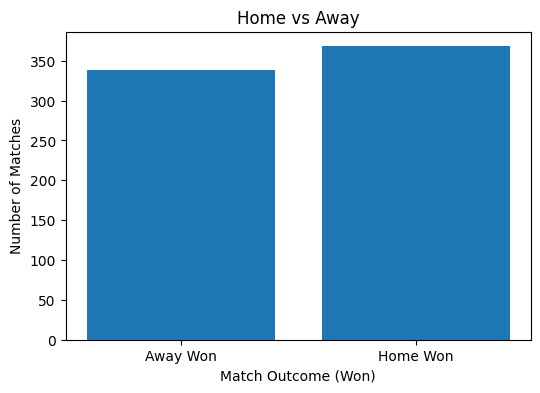

In [48]:
value_counts = home_df['home_won'].value_counts()

# Create a count plot
plt.figure(figsize=(6, 4))  # Adjust figure size as desired
plt.bar(value_counts.index, value_counts.values)
plt.xlabel("Match Outcome (Won)")
plt.xticks([0, 1], ['Away Won', 'Home Won'])
plt.ylabel("Number of Matches")
plt.title("Home vs Away")
plt.show()

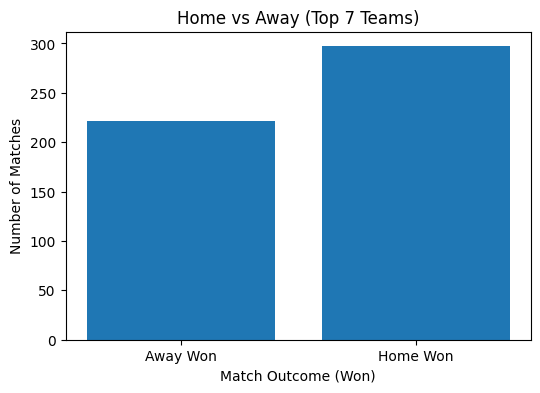

In [57]:
top_teams = ['Australia', 'India', 'Pakistan', 'England', 'South Africa', 'New Zealand', 'West Indies', ]
value_counts = home_df[home_df['host'].isin(top_teams)]['home_won'].value_counts()

# Create a count plot
plt.figure(figsize=(6, 4))  # Adjust figure size as desired
plt.bar(value_counts.index, value_counts.values)
plt.xlabel("Match Outcome (Won)")
plt.xticks([0, 1], ['Away Won', 'Home Won'])
plt.ylabel("Number of Matches")
plt.title("Home vs Away (Top 7 Teams)")
plt.show()